# Part 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt


### a)

In [2]:
def load_dict():
    ind = 0
    word_dict = {}
    with open("./dictionary.txt") as file:
        lines = file.readlines()
        for line in lines:
            word_dict[line[:-1]] = ind
            ind += 1
        
    return word_dict

def load_occur():
    occur_mat = np.loadtxt("co_occur.csv", dtype=np.int, delimiter=",")
    return occur_mat
    
    
word_dict = load_dict()
print(len(word_dict))

# occur_mat = load_occur()
# np.save("occur_mat.npy", occur_mat)
occur_mat = np.load("occur_mat.npy")
print(occur_mat.shape)

word_list = list(word_dict.keys())
def ind2word(ind):
    return word_list[ind]

def word2ind(word):
    return word_dict[word]

def word2occur(word1, word2):
    return occur_mat[word2ind(word1)][word2ind(word2)]

print(ind2word(20))
print(word2ind('woman'))
print(occur_mat[20])
print(word2occur('woman', 'man'))

10000
(10000, 10000)
are
783
[514540 189320 258410 ...     28     14     17]
3959


### b)

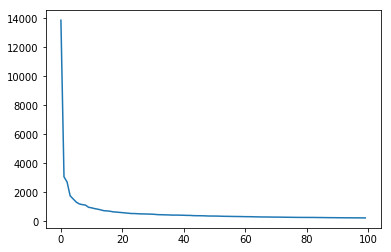

In [3]:
M = np.log(1+occur_mat)
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(M, n_components=100) # 感觉也挺快的就不存了吧
U.shape, Sigma.shape, VT.shape

plt.plot(range(len(Sigma)), Sigma)

Does M˜ seem to be close to a low rank matrix?
<font color='blue'>
    Yes, cause singular near to zero after 20.

### c)

In [5]:
for i in range(20):
    v = U[:, i]
    largest_ind = np.argsort(v)[-10:]
    smallest_ind = np.argsort(v)[:10]
    print("\n%d: "% i)
    print("largest: ", end='')
    for ind in largest_ind:
        print(ind2word(ind), end=', ')
    print("\nsmallest: ", end='')
    for ind in smallest_ind:
        print(ind2word(ind), end=', ')


0: 
largest: was, with, is, as, for, to, in, of, and, the, 
smallest: gmina, insee, householder, increment, midst, peakposition, outskirts, iucn, voivodeship, islander, 
1: 
largest: is, by, as, with, for, to, in, of, and, the, 
smallest: tournaments, leagues, innings, constituency, medals, continent, occasions, pupils, manga, locomotives, 
2: 
largest: michael, thomas, george, william, robert, jr, david, james, john, born, 
smallest: specific, any, data, provide, these, certain, different, systems, types, use, 
3: 
largest: municipal, northern, department, government, regional, national, university, council, county, district, 
smallest: you, album, love, me, my, song, episode, your, vocals, baby, 
4: 
largest: jewish, government, minister, rights, policy, legal, law, religious, social, political, 
smallest: jpg, km, located, near, road, river, lake, route, station, mountain, 
5: 
largest: attacked, emperor, had, were, them, they, soldiers, killed, him, troops, 
smallest: digital, sci

<font color='blue'>
We output the first 20 coloumn to find which are easy-to-interpret semantics.
* 3: Collective or individual
* 4: Ideology or entity
* 5: History war or mordern science
* 6: Art or Science
* 14: Daily life or war



### d)

In [6]:
U_ = U / np.sqrt(np.sum(U*U, axis=1).reshape(-1,1))
v1 = U_[word2ind("woman")]
v2 = U_[word2ind("man")]
v = v1 - v2
v /= np.sqrt(np.sum(v*v))

#### i)

       boy   -0.179178
      girl   0.146664
   brother   -0.308762
    sister   0.147322
      king   -0.213025
     queen   0.137198
        he   -0.094201
       she   0.059879
      john   -0.194742
      mary   0.337449
      wall   -0.056734
      tree   -0.004983


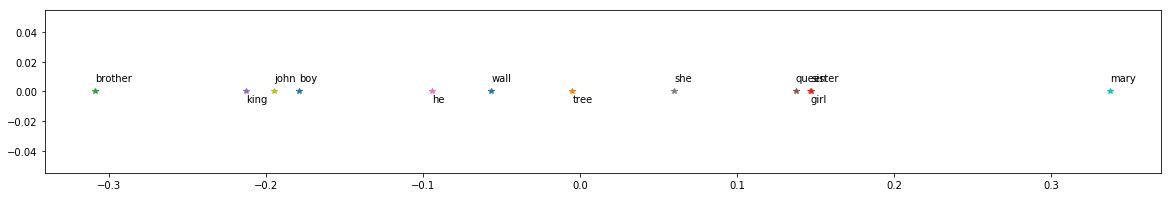

In [7]:
di_list = ["boy", "girl", "brother", "sister", "king", "queen", "he", "she", "john", "mary", "wall", "tree"]
pro_list = np.zeros(len(di_list))

plt.figure(figsize=[20, 3])

for i in range(len(di_list)):
    word = di_list[i]
    pro_list[i] =  np.dot(U_[word2ind(word)],v)/(np.linalg.norm(v))
    plt.plot(pro_list[i], 0, '*')
    plt.text(pro_list[i], np.sign(np.random.rand()-0.5)*0.007, word)
    print("%10s   %.6lf"%(word, pro_list[i]))
    


    

<font color='blue'>
    We can observe that the word pairs such as (boy, girl) which are different by gender would distribute on different side of 0. And the word not about gender such as wall or tree , are close to 0. <br>
    We can say that the vector `woman - man` denoting the gender, and female is the positive direction. <br>
    We find it interesting that word "marry" is the most positive one on the gender direction, which show "marry" is related to "woman" far more than "man".

#### ii)


      math   -0.083791
    matrix   -0.037170
   history   -0.117132
     nurse   0.372734
    doctor   -0.086292
     pilot   -0.011075
   teacher   0.165023
  engineer   -0.238900
   science   -0.062117
      arts   0.188262
literature   0.106687
       bob   -0.128007
     alice   0.281873


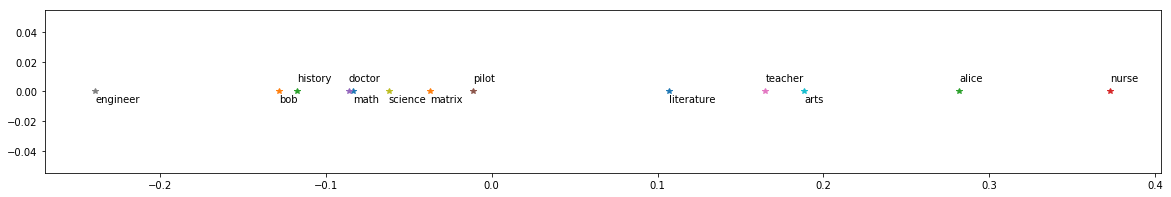

In [8]:
di_list = ["math", "matrix","history", "nurse", "doctor", "pilot", "teacher", "engineer", "science", "arts", "literature", "bob", "alice"]
pro_list = np.zeros(len(di_list))

plt.figure(figsize=[20, 3])

for i in range(len(di_list)):
    word = di_list[i]
    pro_list[i] =  np.dot(U_[word2ind(word)],v)/(np.linalg.norm(v))
    plt.plot(pro_list[i], 0, '*')
    plt.text(pro_list[i], np.sign(np.random.rand()-0.5)*0.007, word)
    print("%10s   %.6lf"%(word, pro_list[i]))

<font color='blue'>
    We can see that some major such as "engineer", "history", "math", "doctor", "science" are more closed to male side, and "teacher", "art", "nurse" are closed to female side.<br>
    This case might be caused by the social culture's prejudice on different gender, and this may cause more prejudices if we use the existing prejudices to predict something like "search for qualified job candidates". 

### e)

#### i)

In [9]:
# similarity_mat = np.zeros((10000, 10000))
# for i in range(10000):
#     if i%100==0:
#         print(i)
#     for j in range(i,10000):
#         similarity_mat[i][j] = np.dot(U_[i],U_[j])
#         similarity_mat[j][i] = similarity_mat[i][j]
# np.save("similarity_mat.npy", similarity_mat)

similarity_mat = np.load("similarity_mat.npy")
print(similarity_mat)
        

[[1.         0.82507188 0.83591488 ... 0.07570692 0.0941387  0.08905585]
 [0.82507188 1.         0.7826799  ... 0.05873232 0.049944   0.05031579]
 [0.83591488 0.7826799  1.         ... 0.07399307 0.06186104 0.06318703]
 ...
 [0.07570692 0.05873232 0.07399307 ... 1.         0.32237008 0.25047993]
 [0.0941387  0.049944   0.06186104 ... 0.32237008 1.         0.18901727]
 [0.08905585 0.05031579 0.06318703 ... 0.25047993 0.18901727 1.        ]]


In [10]:
stanford_v = similarity_mat[word2ind("stanford")]
stanford_v[word2ind("stanford")] = 0
max_ind = np.argmax(stanford_v)
print(ind2word(max_ind))

harvard


#### ii)

In [11]:
def analogy(woman, man, king):
    woman_ind, man_ind, king_ind = word2ind(woman), word2ind(man), word2ind(king)
    quene_v = U_[woman_ind] - U_[man_ind] + U_[king_ind]
    sim = np.sum(U_ * quene_v, axis=1)
    sim[woman_ind] = 0
    sim[man_ind] = 0
    sim[king_ind] = 0
    return ind2word(np.argmax(sim))

analogy("woman", "man", "king")

'queen'

In [12]:
analogy_task = open("analogy_task.txt").readlines()
accuracy = 0
analogy_dict = {}
analogy_ind = 0


for task in analogy_task:
    man, woman, king, queen = task.split()
    if (man, woman) not in analogy_dict.keys():
        analogy_dict[(man, woman)] = analogy_ind
        analogy_ind += 1
    if (king, queen) not in analogy_dict.keys():
        analogy_dict[(king, queen)] = analogy_ind
        analogy_ind += 1
        
right_freq = np.zeros((analogy_ind, analogy_ind))
total_freq = np.zeros((analogy_ind, analogy_ind))


for task in analogy_task:
    man, woman, king, queen = task.split()
    my_queen = analogy(woman, man, king)
    if queen == my_queen:
        accuracy += 1
        right_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
    total_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
#     print(task[:-1], my_queen, queen==my_queen)
    

accuracy /= len(analogy_task)


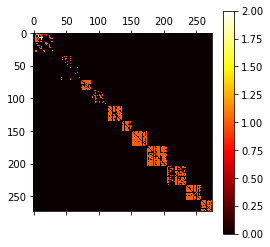

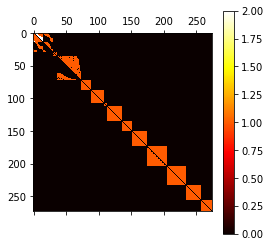

In [13]:
plt.matshow(right_freq, cmap='hot')
plt.colorbar()

plt.matshow(total_freq, cmap='hot')
plt.colorbar()

In [14]:
print("accuracy of analogy task is %.5lf" % accuracy)

accuracy of analogy task is 0.54342


In [15]:
analogy_dict

{('athens', 'greece'): 0,
 ('bangkok', 'thailand'): 1,
 ('beijing', 'china'): 2,
 ('berlin', 'germany'): 3,
 ('cairo', 'egypt'): 4,
 ('canberra', 'australia'): 5,
 ('helsinki', 'finland'): 6,
 ('london', 'england'): 7,
 ('madrid', 'spain'): 8,
 ('moscow', 'russia'): 9,
 ('oslo', 'norway'): 10,
 ('ottawa', 'canada'): 11,
 ('paris', 'france'): 12,
 ('rome', 'italy'): 13,
 ('stockholm', 'sweden'): 14,
 ('tokyo', 'japan'): 15,
 ('belgrade', 'serbia'): 16,
 ('brussels', 'belgium'): 17,
 ('budapest', 'hungary'): 18,
 ('copenhagen', 'denmark'): 19,
 ('dublin', 'ireland'): 20,
 ('kiev', 'ukraine'): 21,
 ('kingston', 'jamaica'): 22,
 ('lima', 'peru'): 23,
 ('lisbon', 'portugal'): 24,
 ('manila', 'philippines'): 25,
 ('santiago', 'chile'): 26,
 ('sofia', 'bulgaria'): 27,
 ('vienna', 'austria'): 28,
 ('warsaw', 'poland'): 29,
 ('brazil', 'real'): 30,
 ('canada', 'dollar'): 31,
 ('europe', 'euro'): 32,
 ('korea', 'won'): 33,
 ('usa', 'dollar'): 34,
 ('vietnam', 'dong'): 35,
 ('chicago', 'illinois'

<font color="blue">
    The total accuracy is 54.342%.<br>
    From the thermodynamic diagram we can see, the first plot is accuacy between pair such as (man, woman), and the second one is whether the pair has been tested in analogy tasks. Section [40, 60] and [100, 110] show lower accuracy, and print the word pairs of these 2 sections we can see that they represent the relationship between city and state, adjectives and adverbs. <br>
    In other word, the word embadding show weak on analogy the relationship between city and state, adjectives and adverbs.

#### III)

In [16]:
M = np.log(1+occur_mat)
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(M, n_components=300) # 感觉也挺快的就不存了吧
print(U.shape, Sigma.shape, VT.shape)

U_ = U / np.sqrt(np.sum(U*U, axis=1).reshape(-1,1))


(10000, 300) (300,) (300, 10000)


accuracy of analogy task is 0.61003


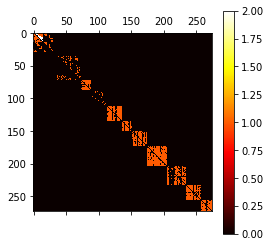

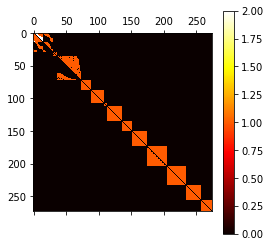

In [17]:
analogy_task = open("analogy_task.txt").readlines()
accuracy = 0
analogy_dict = {}
analogy_ind = 0


for task in analogy_task:
    man, woman, king, queen = task.split()
    if (man, woman) not in analogy_dict.keys():
        analogy_dict[(man, woman)] = analogy_ind
        analogy_ind += 1
    if (king, queen) not in analogy_dict.keys():
        analogy_dict[(king, queen)] = analogy_ind
        analogy_ind += 1
        
right_freq = np.zeros((analogy_ind, analogy_ind))
total_freq = np.zeros((analogy_ind, analogy_ind))


for task in analogy_task:
    man, woman, king, queen = task.split()
    my_queen = analogy(woman, man, king)
    if queen == my_queen:
        accuracy += 1
        right_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
    total_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
#     print(task[:-1], my_queen, queen==my_queen)
    

accuracy /= len(analogy_task)

plt.matshow(right_freq, cmap='hot')
plt.colorbar()

plt.matshow(total_freq, cmap='hot')
plt.colorbar()

print("accuracy of analogy task is %.5lf" % accuracy)

<font color='blue'>
    We try to increase the remain components from 100 to 300, and gain higher accuracy but take too much time.


# Part 2

### a)
<font color='blue'>
    We guess that the picture with rank 1 approximation given by SVD should be **in strip style**, and can be distinguish different color faintly.

### b)

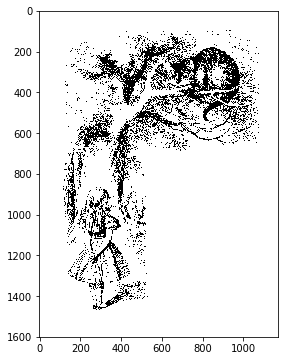

In [18]:
from PIL import Image
im = np.array(Image.open('p5_image.gif').convert('L')).astype("float32")/255
plt.figure(figsize=[10,6])
plt.imshow(im, cmap ='gray')

In [19]:
U, Sigma, VT = np.linalg.svd(im)
print(U.shape, Sigma.shape, VT.shape)

(1600, 1600) (1170,) (1170, 1170)


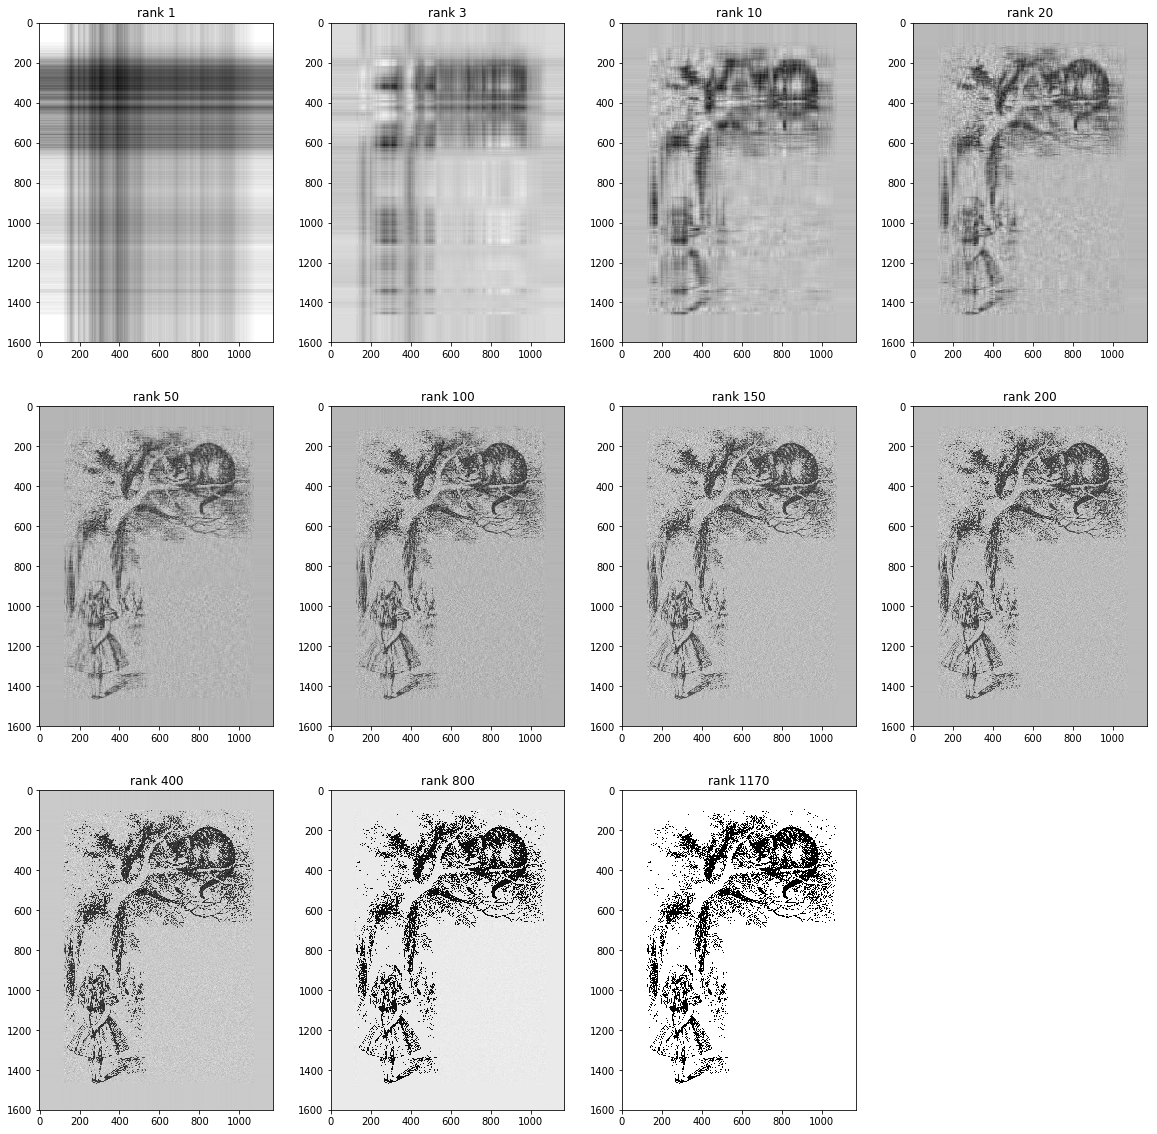

In [20]:
def recover(k):
    return U[:,:k].dot(np.diag(Sigma[:k])).dot(VT[:k, :])

k_lists = [1, 3, 10, 20, 50, 100, 150, 200, 400, 800, 1170]
ind = 1
plt.figure(figsize=[20, 20])
for k in k_lists:
    plt.subplot(3, 4, ind)
    im_k = recover(k)
    min_im = np.min(im_k)
    max_im = np.max(im_k)
    im_k = (im_k-min_im) / (max_im-min_im)
    plt.imshow(im_k, cmap ='gray')
    plt.title("rank %d"%k)
    ind += 1

<font color='blue'>
    As the rank increase, picture became clearer. The rank denoting how much horizontal and vertical lines to draw the picture. In rank 1, we can see only the most bright and the most dark lines describing the picture. As the rank increase, more horizontal and vertical lines began to help to describe the picture.

### c)

<font color='blue'>
    Because the origin picture's rank is 1170, so we cannot get higher rank.

### d)

<font color='blue'>
    For the origin picture, we should store 1 unit for each pixel, totally is $1*1600*1170=1872000$ units.<br>
    For the compress picture, we should only store the $U_k, \Sigma_k, V^T_k$ for k is the rank. Shape of $U_k, \Sigma_k, V^T_k$ are $(1600, k), (k, k), (1170, k)$, because $\Sigma_k$ is a diagonal matrix, so we can only store k units for its diagonal elements. Totally we should store $1600*150 + 150 + 1170*150=415650$ units for $k=150$.<br>
    The compression ratio of using SVD rank 150 approximation is  $415640 / 1872000 = 0.222$. For this picture, totally can reduce 1456360 units space.

### e) Bonus

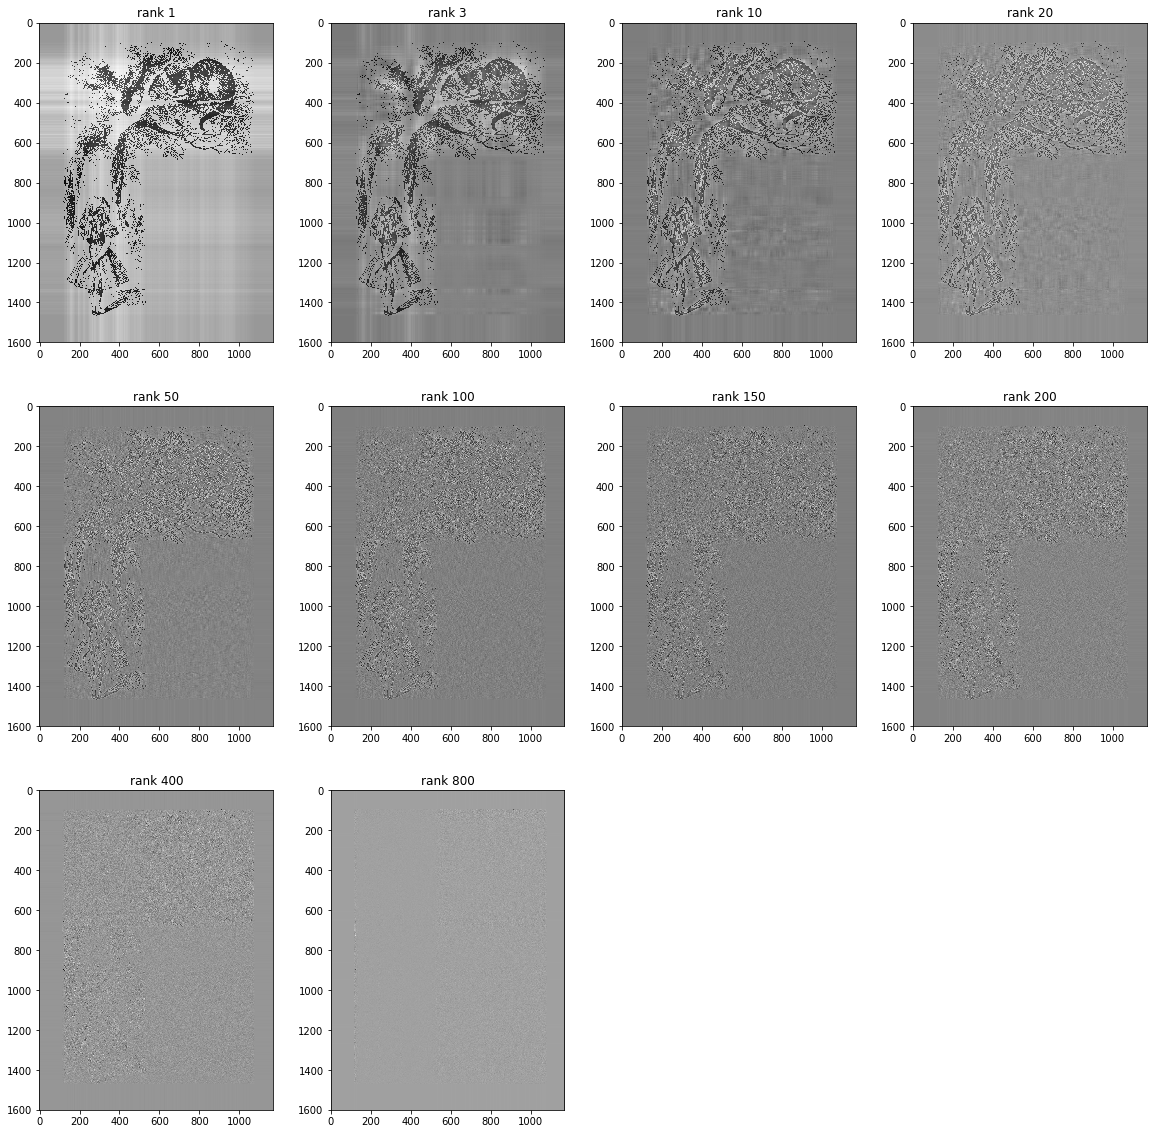

In [21]:
k_lists = [1, 3, 10, 20, 50, 100, 150, 200, 400, 800]
ind = 1
plt.figure(figsize=[20, 20])
for k in k_lists:
    plt.subplot(3, 4, ind)
    im_k = recover(k)
#     min_im = np.min(im_k)
#     max_im = np.max(im_k)
#     im_k = (im_k-min_im) / (max_im-min_im)
    plt.imshow(im - im_k, cmap ='gray')
    plt.title("rank %d"%k)
    ind += 1

<font color='blue'>
     We plot the diff between compressed pictures and the origin picture, find that the haze mainly concentrated on the position where have pattern. Essentially SVD is an approximation algorithm, to approch the origin matrix with product of U, Sigma and V to recover the figure. Each singular value from Sigma represent the importance of the corresponding singular vector from U and V, which can represent a kind of feature for the origin picture. This feature will influence the whole picture because the recovered picture came from linear combination of U and V. Each of the pixel is $p_{x,y} = \sum_{i=0}^k{p_{x,y,rank=i}}$, and normally the $p_{x,y,rank=i}$ get closer to 0 when i increase, but not equal 0. So the haze is $p_{x,y,origin} - \sum_{i=0}^k{p_{x,y,rank=i}} \approx \sum_{i=k+1}^{1170}{p_{x,y,rank=i}}$, and it would decrease when the rank increase, but not disappear.
